Text(0.5, 1.0, 'Detected Objects: 14')

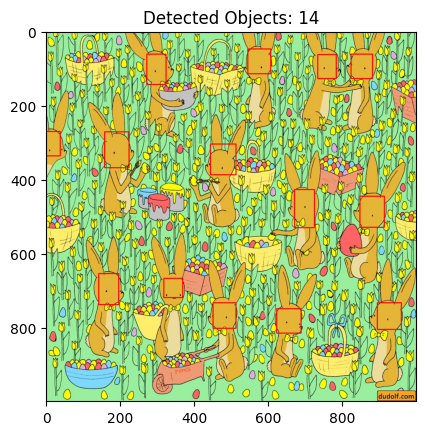

In [ ]:
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Load images
image = cv2.imread("imgs/root_img/rabbit1.jpeg")  # Original image
template = cv2.imread("imgs/template/rabbit.jpeg")  # Small color sample

# Convert images to HSV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
template_hsv = cv2.cvtColor(template, cv2.COLOR_BGR2HSV)

# Get the average color of the template
#avg_color = np.mean(template_hsv, axis=(0, 1))  # (H, S, V)
pixels = template_hsv.reshape(-1, 3)

# Convert to list of tuples
pixels = [tuple(p) for p in pixels]

# Find the most common color
avg_color = Counter(pixels).most_common(1)[0][0]


# Define color range for thresholding
lower_bound = np.array([avg_color[0] - 1, avg_color[1] - 1, avg_color[2] - 1])  # Adjust hue range
upper_bound = np.array([avg_color[0] + 1, avg_color[1] + 1, avg_color[2] + 1])

# Create a mask based on color range
mask = cv2.inRange(image_hsv, lower_bound, upper_bound)

# Find contours of detected regions
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

min_area = 1400
#max_area = 5000
filtered_contours = []
rabbit_count = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if min_area < area:
        # Optional: Filter by aspect ratio (e.g., rabbits are longer than they are wide)
      filtered_contours.append(cnt)
      rabbit_count+=1

# Draw bounding boxes around detected rabbits
for cnt in filtered_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

# Save and display the results
cv2.imwrite("imgs/outputs/rabbit_solution_3.jpg", image)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title(f"Detected Objects: {rabbit_count}")